In [1]:
import sys
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt



path='/home/jbohne/sbu/'
sys.path.append(f'{path}taq_db/TAQ-Query-Scripts/data')
sys.path.append(f'{path}research/Adaptive_Signal_Estimation_Private')

from trend_filtering.adaptive_tf import adaptive_tf
from trend_filtering.test_adaptive_tf import test_adaptive_tf
from profiling.profiler import profile

In [2]:
trades=pd.read_csv(f'{path}taq_db/TAQ-Query-Scripts/data/AAPL_trades.csv',index_col=0).dropna()

price=trades['Trade_Price'].values

### Overview of Estimation

No solution found for lambda = 1267.9201073491768
Status: maxiter exceeded
No solution found for lambda = 1521.484128819012
Status: maxiter exceeded
No solution found for lambda = 1775.0481502888474
Status: maxiter exceeded
No solution found for lambda = 2028.6121717586827
Status: maxiter exceeded
No solution found for lambda = 2282.176193228518
Status: maxiter exceeded


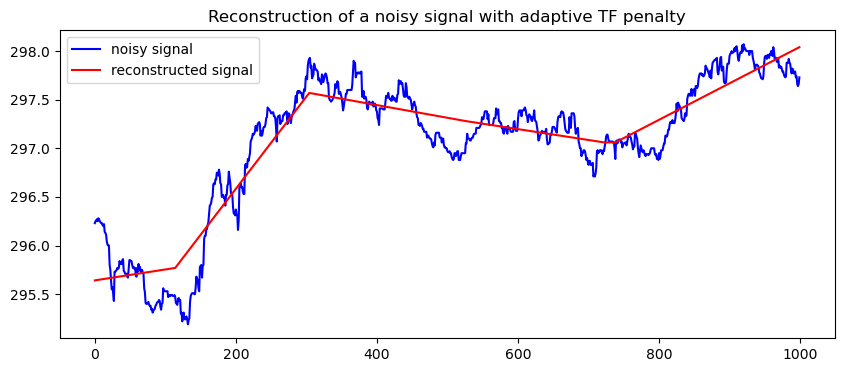

In [3]:
test_adaptive_tf(price,1000,include_cv=True,lambda_p=1.0,plot=True,verbose=True)

### Performance of Sherman-Morrison -Woodbury Formula vs Naive Matrix Inversion (With Numba)


Naive Matrix Inversion

In [4]:
profile(test_adaptive_tf)(price,500,include_cv=False,lambda_p=1.0,plot=False,verbose=False)

Profiling: test_adaptive_tf

*** PROFILER RESULTS ***
inner (/home/jbohne/sbu/research/Adaptive_Signal_Estimation_Private/profiling/profiler.py:10)
function called 1 times

         1879 function calls (1876 primitive calls) in 0.465 seconds

   Ordered by: cumulative time, internal time, call count

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.465    0.465 profiler.py:10(inner)
        1    0.000    0.000    0.465    0.465 test_adaptive_tf.py:10(test_adaptive_tf)
        1    0.005    0.005    0.454    0.454 adaptive_tf.py:14(adaptive_tf)
       45    0.423    0.009    0.424    0.009 adaptive_tf.py:107(update_step)
       46    0.014    0.000    0.015    0.000 adaptive_tf.py:85(prep_matrices)
        1    0.000    0.000    0.010    0.010 difference_matrix.py:9(__init__)
       46    0.009    0.000    0.009    0.000 adaptive_tf.py:94(compute_objective)
        1    0.000    0.000    0.003    0.003 difference_matrix.py:43(inver

### Sherman-Morrison -Woodbury Formula

(Not Proven to be an Increase in performance atm)

### Effect of Numba Compilation

-Has proven to increase performance